In [1]:
import h5py
import glob
import numpy as np
from util import plot
from util.atlas import Atlas
import matplotlib.pyplot as plt

from himalaya.scoring import correlation_score

In [2]:
%cd ..

/scratch/gpfs/zzada/narrative-gradients


In [62]:
narrative = 'forgot'
narrative = 'black'

modelname = 'acoustic'
modelname = 'syntactic'
modelname = 'articulatory'
modelname = 'gemma-2b'

narratives = ['black', 'forgot']
models = ['acoustic', 'articulatory', 'syntactic', 'gemma-2b', 'gemma2-9b_22-layer']
# layer = 16

In [63]:
foldername = 'encoding'
modelname = models[-1]
print(modelname)

files = glob.glob(f'results/{foldername}/sub-*/{modelname}/*h5')
len(files)

gemma2-9b_22-layer


46

In [64]:
for filename in files:
    with h5py.File(filename, 'r') as f:
        preds = f['black_preds'][1, :, :].sum(0)
        zeros = np.nonzero(preds == 0)[0]
        if len(zeros):
            print(filename, zeros)

In [59]:
with h5py.File(f'results/encoding/sub-267/{modelname}/sub-267.h5') as f:
    print(f.keys())
    black_scores = f['black_scores'][...]
    black_actual = f['black_actual'][...]
    forgot_actual = f['forgot_actual'][...]
    black_preds = f['black_preds'][...]

<KeysViewHDF5 ['black_actual', 'black_preds', 'black_scores', 'forgot_actual', 'forgot_preds', 'forgot_scores']>


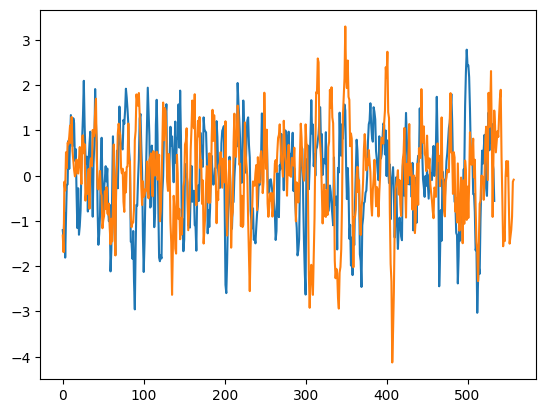

In [58]:
plt.plot(black_actual[:, 69])
plt.plot(forgot_actual[:, 69])